In [1]:
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.sql.types import *


spark = SparkSession.builder \
         .master("local") \
         .appName("ldsaproject") \
         .config("spark.some.config.option", "some-value") \
         .getOrCreate()
        
sc = spark.sparkContext

In [2]:
from pyspark.sql.types import  (StructType, 
                                StructField, 
                                DateType, 
                                BooleanType,
                                DoubleType,
                                IntegerType,
                                StringType,
                               TimestampType)
library_schema = StructType([StructField("LOCATION", StringType(), True),
                            StructField("ADDRESS", StringType(), True),
                            StructField("CITY", StringType(), True ),
                            StructField("ZIP", IntegerType(), True),
                            StructField("JANUARY", IntegerType(), True),
                            StructField("FEBRUARY", IntegerType(), True  ),
                            StructField("MARCH", IntegerType(), True ),
                            StructField("APRIL", IntegerType(), True ),
                            StructField("MAY", IntegerType(), True),
                            StructField("JUNE", IntegerType(), True),
                            StructField("JULY", IntegerType(), True),
                            StructField("AUGUST", IntegerType(), True),
                            StructField("SEPTEMBER", IntegerType(), True),
                            StructField("OCTOBER", IntegerType(), True),
                            StructField("NOVEMBER", IntegerType(), True ),
                            StructField("DECEMBER", IntegerType(), True),
                            StructField("YTD", IntegerType(), True )
                            ])

In [4]:
library = spark.read.csv("Library_2013.csv",
                          header = True, 
                          schema = library_schema)

In [5]:
library.count()

79

In [6]:
library.columns

['LOCATION',
 'ADDRESS',
 'CITY',
 'ZIP',
 'JANUARY',
 'FEBRUARY',
 'MARCH',
 'APRIL',
 'MAY',
 'JUNE',
 'JULY',
 'AUGUST',
 'SEPTEMBER',
 'OCTOBER',
 'NOVEMBER',
 'DECEMBER',
 'YTD']

In [7]:
library_filtered = library.select("LOCATION","YTD")

In [8]:
library_filtered.show()

+--------------------+------+
|            LOCATION|   YTD|
+--------------------+------+
|       Albany Park  |   421|
|           Altgeld  | 63052|
|     Archer Heights*|110419|
|             Austin | 89762|
|     Austin-Irving  |126397|
|             Avalon*|124050|
|   Back of the Yards| 23759|
|            Beverly*|102975|
|           Bezazian |175006|
|         Blackstone |139554|
|           Brainerd*| 56516|
|      Brighton Park | 82572|
|Bucktown-Wicker P...|135970|
|      Budlong Woods*|173389|
|        Canaryville | 54427|
|        Chicago Bee*| 57931|
|      Chicago Lawn  | 87997|
|          Chinatown |235057|
|           Clearing*| 85359|
|            Coleman*|108949|
+--------------------+------+
only showing top 20 rows



In [10]:
library_filtered=library_filtered.toPandas()

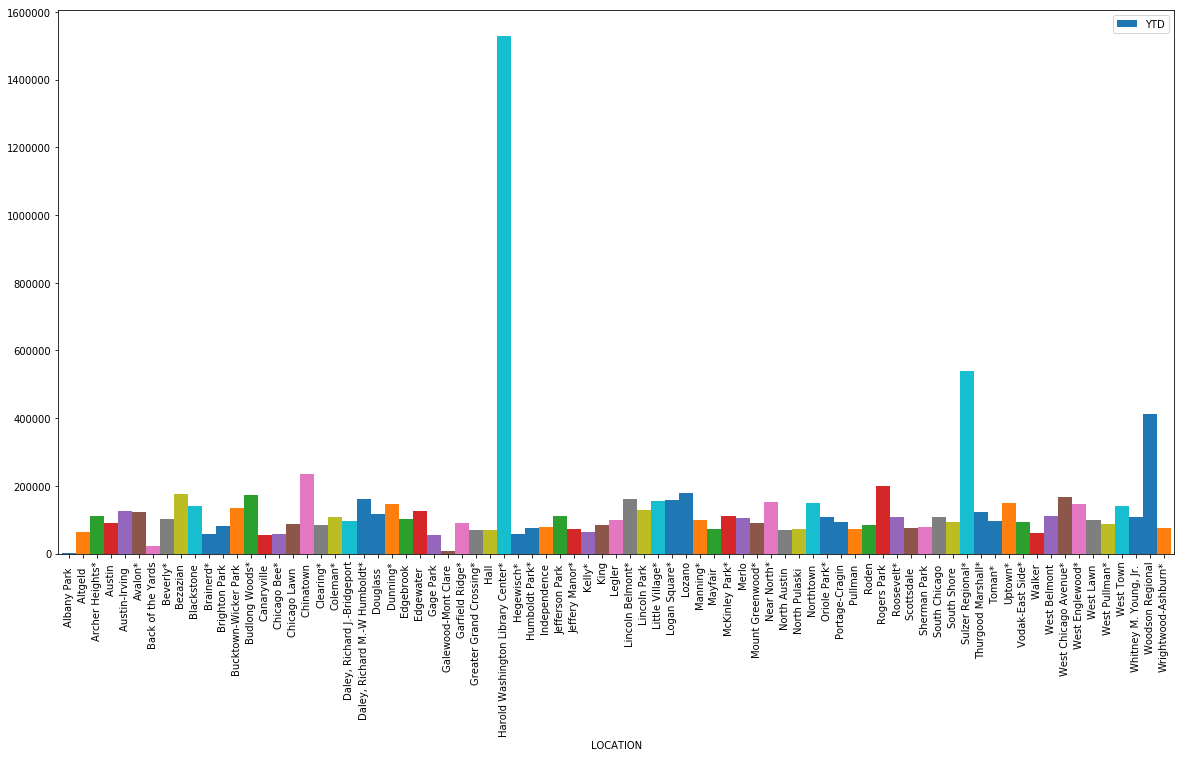

In [23]:
%matplotlib inline
library_filtered.plot.bar(x='LOCATION',y='YTD', width=1, figsize=(20,10))